<a href="https://colab.research.google.com/github/Lfirenzeg/msds602labs/blob/main/Final_Project_602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Final Project**

##  **Analysis of the CUNY SPS MSDS Program and Data Science Job Market Trends**
### **Data 602**
### **Luis Munoz Grass**

# **Abstract**

Data science as a field continues to grow at an incredible speed, with organizations increasingly targeting professionals with a blend of technical expertise, programming proficiency, and essential soft skills. To remain competitive, academic programs must align their curriculum with the skills currently in demand by the industry and effectively advertise them to attract prospective students. This project examines whether the Master of Science in Data Science (MSDS) program offered by CUNY School of Professional Studies (SPS) advertises the skills most sought after in the data science job market.

Using data scraped from major job platforms, the project categorized the most frequently requested skills into three groups: technical skills, programming languages, and soft skills. These findings were then compared to the skills explicitly advertised in the CUNY SPS MSDS program, based on the course descriptions available on the program’s official website. The analysis identified alignment in some key areas but also highlighted missed opportunities to showcase additional skills from the top 5 or top 10 lists in each category.

This study underscores the importance of ensuring that the skills advertised in program descriptions align with current industry trends. A failure to explicitly highlight key competencies in publicly available materials may result in missed opportunities to attract top talent and adequately convey the program’s ability to prepare students for the challenges and demands of the evolving data science profession.



# **Introduction**

### **Does the Master of Science in Data Science (MSDS) offered by CUNY SPS advertize the skills currently in demand in the job market for data science?**

The idea for this project came from the realization that a program’s ability to attract students is not solely determined by the quality of its curriculum but also by how well it showcases its relevance to industry trends. By analyzing job postings from major platforms, the project identified the most frequently requested skills across three categories: technical skills, programming languages, and soft skills. These findings were then cross-referenced with the skills advertised in the MSDS program, based on publicly available course descriptions and the main program website.

The project employs data scraping, cleaning, and analysis techniques to uncover insights about the alignment between the program’s advertised skills and the demands of the job market. By categorizing and comparing the skills, the study highlights both areas of strength and missed opportunities in the program’s advertising strategy. Ultimately, this analysis aims to provide actionable insights for program managers to enhance their outreach efforts, as well as to assist current and prospective students in making informed decisions about their education in the field of data science.

# **Data Wrangling**

A Python program to scrap data from different job posts URLs (please see program in Github:"https://github.com/Lfirenzeg/msds602labs/blob/main/Project/Skill_Search.py"), and stored every entry in a .csv file.

With a CSV file ready containing the list of skills for each job post we can proceed to organize the information a bit more.

Load the needed libraries, and load the data, which in this case is hosted in GitHub

We can see that we have 3 initial data sets:

- **skills_df**: Which works as a sort of dictionary for skills and what category it belongs to.

- **companies_skills_df**: Wich is the result of the data scrapped and stored in a .csv, with the columns: url, timestamp, skills, position, company and industry. However, it currently has no headers.

- **masters_skills_df**: Which is the result of the data scrapped and stored from the masters website and curriculu, with the columns Course, Title, Required, Skills.

We'll assign headers to the companies_skills_df table and remove some columns that are not necessary for the analysis, such as URL and Timestamp.

Also, in order to facilitate the comparison we'll use 3 categories instead of 4 for the skills. In this case we'll merge Business Skills with Soft Skills.

To organize the data a bit more, we'll be separating the companies_skills_df table into two separate tables:

- **company_industry_table**: Focused on storing name of company and the industry it belongs to.

- **skills_job_post**: Focused on storing main information we'll be working with: Position, skills and company.

Finally, since our current list of skills in the table for job posts does not distinguish by category we'll split the column skills into 3, according to category of skill to facilitate analysis.

In [11]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

# Load the Data from GitHub
skills_url = "https://raw.githubusercontent.com/Lfirenzeg/msds602labs/refs/heads/main/Project/skills.csv"
companies_skills_url = "https://raw.githubusercontent.com/Lfirenzeg/msds602labs/refs/heads/main/Project/companies_skills.csv"
masters_skills_url = "https://raw.githubusercontent.com/Lfirenzeg/msds602labs/refs/heads/main/Project/MSDS_Course_Skills.csv"

# Load the CSV files into Pandas DataFrames
skills_df = pd.read_csv(skills_url)
companies_skills_df = pd.read_csv(companies_skills_url, header=None)
masters_skills_df = pd.read_csv(masters_skills_url).fillna('NA')

# Display the first few rows of each table to confirm data was loaded successfully
print(skills_df.head())
print(companies_skills_df.head())
print(masters_skills_df.head())

# Assign Headers to the Companies Skills DataFrame
companies_skills_df.columns = ["URL", "Timestamp", "Skills", "Position", "Company", "Industry"]

# Remove Unnecessary Columns
companies_skills_df = companies_skills_df.drop(columns=["URL", "Timestamp"])

# Merge Business Skills and Soft Skills Categories
skills_df["category"] = skills_df["category"].replace("Business Skills", "Soft Skills")

# Check Updated Table
print(skills_df.head())

# Split Companies Skills DataFrame into Two Separate Tables
skills_job_post = companies_skills_df[["Position", "Skills", "Company"]].copy()
company_industry_table = companies_skills_df[["Company", "Industry"]].drop_duplicates()

# Create Lists of Skills by Category
technical_skills_full_list = skills_df[skills_df["category"] == "Technical Skills"]["skill"].tolist()
programming_skills_full_list = skills_df[skills_df["category"] == "Programming Languages"]["skill"].tolist()
soft_skills_full_list = skills_df[skills_df["category"] == "Soft Skills"]["skill"].tolist()

# Helper Function to Extract Skills Based on Category
def extract_skills(skill_list, category_list):
    return ", ".join(set(skill_list).intersection(category_list))

# Process Each Category in the Skills Job Post Table
skills_job_post["Technical_Skills"] = skills_job_post["Skills"].apply(lambda x: extract_skills(str(x).split(", "), technical_skills_full_list))
skills_job_post["Programming_Languages"] = skills_job_post["Skills"].apply(lambda x: extract_skills(str(x).split(", "), programming_skills_full_list))
skills_job_post["Soft_Skills"] = skills_job_post["Skills"].apply(lambda x: extract_skills(str(x).split(", "), soft_skills_full_list))

# Remove Original Skills Column
skills_job_post = skills_job_post.drop(columns=["Skills"])

# View Updated Table
print(skills_job_post.head())


                skill               category
0              Python  Programming Languages
1                   R  Programming Languages
2       Data Analysis       Technical Skills
3      Data Wrangling       Technical Skills
4  Data Visualization       Technical Skills
                                                   0                 1  \
0  https://www.indeed.com/jobs?q=data+scientist&l...   10/8/2024 20:22   
1  https://www.indeed.com/jobs?q=data+scientist&l...   10/8/2024 20:26   
2  https://www.indeed.com/jobs?q=data+scientist&l...   10/8/2024 20:56   
3  https://www.indeed.com/jobs?q=data+scientist&l...  10/10/2024 10:46   
4  https://www.indeed.com/jobs?q=data+scientist&l...  10/10/2024 10:48   

                                                   2  \
0  R, SQL, Python, Data Visualization, Machine Le...   
1  R, SQL, Python, Data Analysis, Data Visualizat...   
2  C, C++, SQL, Python, Data Analysis, Data Visua...   
3  Python, Data Analysis, Data Visualization, Mac...   
4  R,

# **Exploratory Data Analysis**

## **What skills are the most sought after?**

Now that we have the skills_job_post table tidied to our liking, we can start creating smaller tables for summary data and analyse them. This will guide us in getting an idea of what are some of the most commonly requested skills in job posts.

For this project we'll take a look at the skills based on 3 categories, technical skills, programming languages and soft skills.

We can start by creating a summary table for **Technical Skills**:

In [12]:
# Analysis by Skill Category
# Extract all technical skills from the "Technical_Skills" column
all_technical_skills = list(chain.from_iterable([str(skills).split(", ") for skills in skills_job_post["Technical_Skills"]]))

# Create a summary table that counts the occurrences of each technical skill
technical_skills_summary = pd.DataFrame(pd.Series(all_technical_skills).value_counts()).reset_index()
technical_skills_summary.columns = ["Name", "Count"]

# Calculate the percentage of occurrences
total_posts = 50  # Assuming there are 50 job posts
technical_skills_summary["Percentage"] = (technical_skills_summary["Count"] / total_posts) * 100

# Organize the table by Count in descending order
technical_skills_summary = technical_skills_summary.sort_values(by="Count", ascending=False)

# Visualize the summary table
print(technical_skills_summary)



                     Name  Count  Percentage
0        Machine Learning     50       100.0
1                   Excel     39        78.0
2             Data Mining     36        72.0
3    Statistical Analysis     29        58.0
4      Data Visualization     29        58.0
..                    ...    ...         ...
49        Shell Scripting      1         2.0
47                 DevOps      1         2.0
46  Quantitative Research      1         2.0
45       Model Validation      1         2.0
64   Time Series Analysis      1         2.0

[65 rows x 3 columns]


And if we want to visualize this using seaborn:

<ipython-input-13-995d9d899f40>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Name", data=top_10_tech_skills, palette="Blues_d")


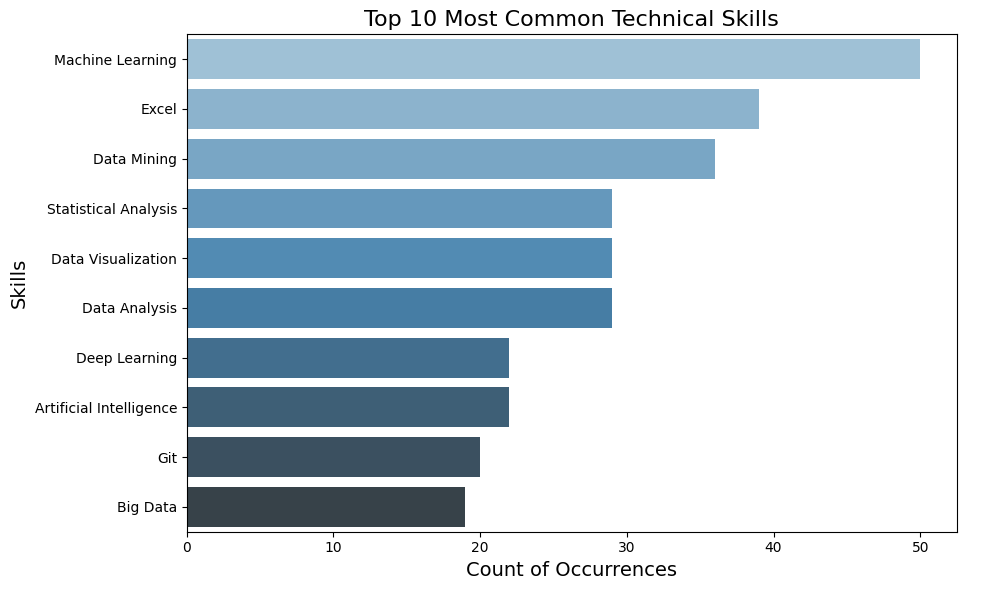

In [13]:
# Plot for Technical Skills
# Select the top 10 technical skills
top_10_tech_skills = technical_skills_summary.head(10)

# Generate the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Name", data=top_10_tech_skills, palette="Blues_d")

# Add percentage labels to the bars
for index, row in top_10_tech_skills.iterrows():
    plt.text(row.Count + 0.5, index, f"{row.Percentage:.1f}%", va='center', fontsize=10, color="white")

# Add plot labels and title
plt.title("Top 10 Most Common Technical Skills", fontsize=16)
plt.xlabel("Count of Occurrences", fontsize=14)
plt.ylabel("Skills", fontsize=14)
plt.tight_layout()
plt.show()

### **What does this tell us?**

- Machine Learning emerges as the most valued skill, appearing in 100% of job postings (50 counts). Other significant skills include Excel (78%), Data Mining (72%), and Data Analysis (58%). This indicates that proficiency in traditional data manipulation and analysis tools remains vital for anyone planning to be in a data science role.

- Deep Learning and Git also make the list, highlighting the relevance of newer technologies and version control in the data science field. This is significant as it shows a trend towards more complex modeling techniques and the importance of collaboration in projects.


Now what do we find for **Programming Languages**?

In [14]:
# Extract all programming languages from the "Programming_Languages" column
all_programming_skills = list(chain.from_iterable([str(skills).split(", ") for skills in skills_job_post["Programming_Languages"]]))

# Create a summary table that counts the occurrences of each programming language
programming_languages_summary = pd.DataFrame(pd.Series(all_programming_skills).value_counts()).reset_index()
programming_languages_summary.columns = ["Name", "Count"]

# Calculate the percentage of occurrences
programming_languages_summary["Percentage"] = (programming_languages_summary["Count"] / total_posts) * 100

# Organize the table by Count in descending order
programming_languages_summary = programming_languages_summary.sort_values(by="Count", ascending=False)

# Visualize the summary table
print(programming_languages_summary)

            Name  Count  Percentage
0         Python     46        92.0
1            SQL     46        92.0
2              R     28        56.0
3     TensorFlow     13        26.0
4            C++      5        10.0
5   Scikit-Learn      5        10.0
6        PyTorch      5        10.0
7         MATLAB      4         8.0
8           Java      4         8.0
9     Matplotlib      4         8.0
12        Pandas      3         6.0
10       Seaborn      3         6.0
11         Keras      3         6.0
13            C#      2         4.0
14         MySQL      2         4.0
15    PostgreSQL      2         4.0
16                    2         4.0
17       MongoDB      1         2.0
18    JavaScript      1         2.0
19         NoSQL      1         2.0
20          Bash      1         2.0


And the visual for programming languages:

<ipython-input-8-e75479cb22ff>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Name", data=top_10_prog_skills, palette="Reds_d")


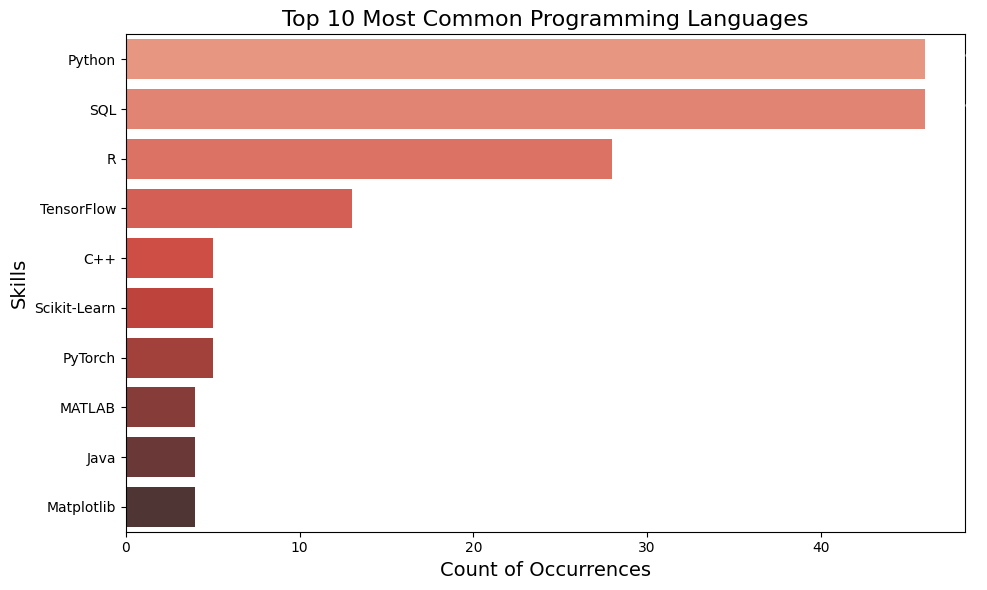

In [8]:
# Plot for Programming Languages
# Select the top 10 programming languages
top_10_prog_skills = programming_languages_summary.head(10)

# Generate the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Name", data=top_10_prog_skills, palette="Reds_d")

# Add percentage labels to the bars
for index, row in top_10_prog_skills.iterrows():
    plt.text(row.Count + 0.5, index, f"{row.Percentage:.1f}%", va='center', fontsize=10, color="white")

# Add plot labels and title
plt.title("Top 10 Most Common Programming Languages", fontsize=16)
plt.xlabel("Count of Occurrences", fontsize=14)
plt.ylabel("Skills", fontsize=14)
plt.tight_layout()
plt.show()

### **What does this tell us?**

- Python and SQL are the most sought-after programming languages, each appearing in 92% of job postings. The high count for these 2 languages aligns with current industry trends, suggesting that job seekers should prioritize learning these languages to remain competitive in the job market.

- R appears in 56% of job postings, highlighting its relevance, particularly in statistical analysis and data visualization. While not as dominant as Python and SQL, it remains an important language for data scientists, especially those in academic or research-focused roles.

Finally, let's take a look at **Soft Skills**:

                           Name  Count  Percentage
0                    Leadership     38        76.0
1                 Communication     30        60.0
2            Project Management     29        58.0
3             Critical Thinking     26        52.0
4                    Innovation     24        48.0
5                 Collaboration     24        48.0
6         Business Intelligence     17        34.0
7           Attention to Detail      7        14.0
8                     Mentoring      4         8.0
9           Presentation Skills      3         6.0
13              Problem Solving      2         4.0
15  Data-Driven Decision Making      2         4.0
14              Business Acumen      2         4.0
12              Time Management      2         4.0
11                     Teamwork      2         4.0
10           Team Collaboration      2         4.0
16                  Negotiation      1         2.0
17                        Scrum      1         2.0
18        Customer Segmentation

<ipython-input-15-2b28339a0576>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Name", data=top_10_soft_skills, palette="Greens_d")


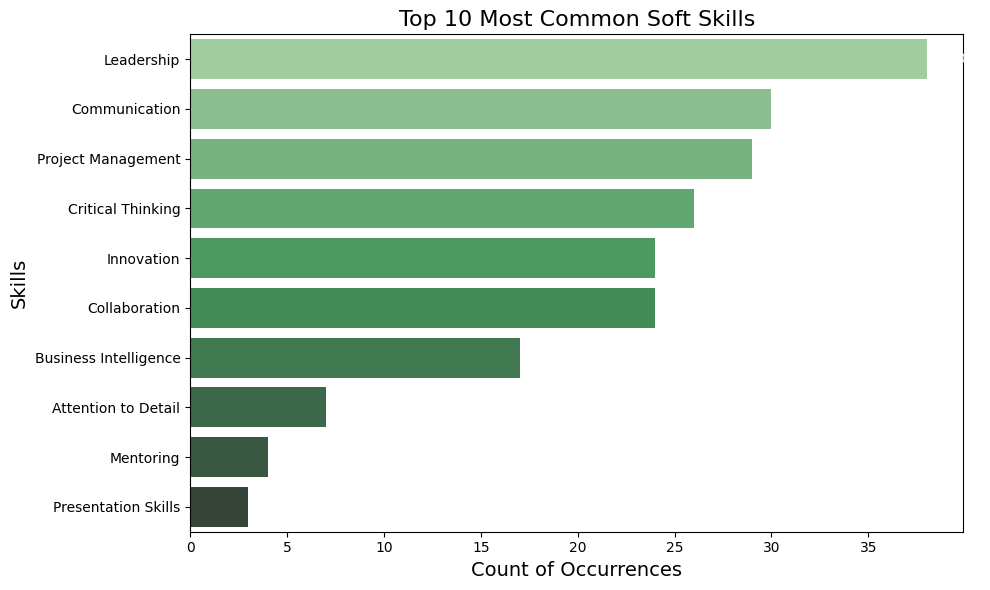

In [15]:
# Extract all soft skills from the "Soft_Skills" column
all_soft_skills = list(chain.from_iterable([str(skills).split(", ") for skills in skills_job_post["Soft_Skills"]]))

# Create a summary table that counts the occurrences of each soft skill
soft_skills_summary = pd.DataFrame(pd.Series(all_soft_skills).value_counts()).reset_index()
soft_skills_summary.columns = ["Name", "Count"]

# Calculate the percentage of occurrences
soft_skills_summary["Percentage"] = (soft_skills_summary["Count"] / total_posts) * 100

# Organize the table by Count in descending order
soft_skills_summary = soft_skills_summary.sort_values(by="Count", ascending=False)

# Visualize the summary table
print(soft_skills_summary)

# Plot for Soft Skills
# Select the top 10 soft skills
top_10_soft_skills = soft_skills_summary.head(10)

# Generate the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Name", data=top_10_soft_skills, palette="Greens_d")

# Add percentage labels to the bars
for index, row in top_10_soft_skills.iterrows():
    plt.text(row.Count + 0.5, index, f"{row.Percentage:.1f}%", va='center', fontsize=10, color="white")

# Add plot labels and title
plt.title("Top 10 Most Common Soft Skills", fontsize=16)
plt.xlabel("Count of Occurrences", fontsize=14)
plt.ylabel("Skills", fontsize=14)
plt.tight_layout()
plt.show()

### **What does this tell us?**

- As we can see in the plot, leadership is the most frequently mentioned soft skill, appearing in 76% of job postings. This could indicate that employers value leadership abilities in potential candidates, reflecting the need for individuals who can guide teams and projects effectively.

- Communication skills are essential, as they appear in 60% of job postings. It's also interesting to see critical thinking (52%) and collaboration (48%), as this shows an interest in candidates that can both be team players but also analyze situations thoughtfully and develop solution more independently when needed.


## **What skills are being advertised in the MSDS offered by CUNY SPS?**

Let's now see what are the skills advertised for the Masters in Data Science offered by CUNY School of Professional Studies. The data was scrapped from the website and main curriculum, creating a CSV file listing the skills found in the main website and the description of each course.



In [19]:
# Explore Masters Skills DataFrame
# Extract all skills mentioned in the 'masters_skills_df' file
masters_skills_flat = list(chain.from_iterable([str(Skills).split(", ") for Skills in masters_skills_df["Skills"]]))

# Create a summary table with counts of each skill
masters_skills_summary = pd.DataFrame(pd.Series(masters_skills_flat).value_counts()).reset_index()
masters_skills_summary.columns = ["Skill", "Count"]

# Classify each skill into a category
def classify_skill(skill):
    if skill in technical_skills_full_list:
        return "Technical Skill"
    elif skill in programming_skills_full_list:
        return "Programming Language"
    elif skill in soft_skills_full_list:
        return "Soft Skill"
    else:
        return None  # Skills without a category will be marked as None

# Apply classification and drop rows where Category is None
masters_skills_summary["Category"] = masters_skills_summary["Skill"].apply(classify_skill)
masters_skills_summary = masters_skills_summary.dropna(subset=["Category"])

# Display the summary table
print(masters_skills_summary)



                      Skill  Count              Category
1          Machine Learning      4       Technical Skill
4                         R      2  Programming Language
5     Business Intelligence      2            Soft Skill
6                  Big Data      2       Technical Skill
7                    Hadoop      2       Technical Skill
8                  Teamwork      2            Soft Skill
9               Data Mining      2       Technical Skill
10                   Python      2  Programming Language
11       Hypothesis Testing      1       Technical Skill
12        Critical Thinking      1            Soft Skill
13     Time Series Analysis      1       Technical Skill
14           Classification      1       Technical Skill
15              Text Mining      1       Technical Skill
16               Clustering      1       Technical Skill
17  Artificial Intelligence      1       Technical Skill
18                    Spark      1       Technical Skill
19       Linear Programming    

And finally we can compare the skills from the masters dataframe and the companies dataframe.

In [22]:
# Comparison of Skills
# Define Relevance Based on Top Skills
def determine_relevance(skill):
    if skill in technical_skills_summary.head(5)["Name"].tolist():
        return "Top 5 Technical"
    elif skill in technical_skills_summary.head(10)["Name"].tolist():
        return "Top 10 Technical"
    elif skill in programming_languages_summary.head(5)["Name"].tolist():
        return "Top 5 Programming"
    elif skill in programming_languages_summary.head(10)["Name"].tolist():
        return "Top 10 Programming"
    elif skill in soft_skills_summary.head(5)["Name"].tolist():
        return "Top 5 Soft"
    elif skill in soft_skills_summary.head(10)["Name"].tolist():
        return "Top 10 Soft"
    else:
        return "Outside Top 10"

# Apply Relevance Determination
masters_skills_summary["Relevance"] = masters_skills_summary["Skill"].apply(determine_relevance)

# Drop unnecessary columns
masters_skills_summary = masters_skills_summary[["Skill", "Count", "Category", "Relevance"]]

# Display the updated summary table
print(masters_skills_summary)


                      Skill  Count              Category          Relevance
1          Machine Learning      4       Technical Skill    Top 5 Technical
4                         R      2  Programming Language  Top 5 Programming
5     Business Intelligence      2            Soft Skill        Top 10 Soft
6                  Big Data      2       Technical Skill   Top 10 Technical
7                    Hadoop      2       Technical Skill     Outside Top 10
8                  Teamwork      2            Soft Skill     Outside Top 10
9               Data Mining      2       Technical Skill    Top 5 Technical
10                   Python      2  Programming Language  Top 5 Programming
11       Hypothesis Testing      1       Technical Skill     Outside Top 10
12        Critical Thinking      1            Soft Skill         Top 5 Soft
13     Time Series Analysis      1       Technical Skill     Outside Top 10
14           Classification      1       Technical Skill     Outside Top 10
15          


### **What about skills not being advertized?**

In [23]:
# Find Top Skills Missing from Masters DataFrame
# Combine top skills from each category
top_technical = set(technical_skills_summary.head(10)["Name"].tolist())
top_programming = set(programming_languages_summary.head(10)["Name"].tolist())
top_soft = set(soft_skills_summary.head(10)["Name"].tolist())

# Extract skills from masters
masters_skills_set = set(masters_skills_summary["Skill"].tolist())

# Identify missing skills
missing_technical = top_technical - masters_skills_set
missing_programming = top_programming - masters_skills_set
missing_soft = top_soft - masters_skills_set

# Create a table summarizing missing skills
missing_skills = pd.DataFrame({
    "Category": ["Technical"] * len(missing_technical) + ["Programming"] * len(missing_programming) + ["Soft"] * len(missing_soft),
    "Skill": list(missing_technical) + list(missing_programming) + list(missing_soft)
})

# Display missing skills table
print(missing_skills)

       Category                 Skill
0     Technical         Deep Learning
1     Technical                   Git
2     Technical  Statistical Analysis
3     Technical                 Excel
4     Technical         Data Analysis
5     Technical    Data Visualization
6   Programming                   C++
7   Programming            TensorFlow
8   Programming               PyTorch
9   Programming                MATLAB
10  Programming          Scikit-Learn
11  Programming                  Java
12  Programming            Matplotlib
13         Soft   Attention to Detail
14         Soft             Mentoring
15         Soft            Leadership
16         Soft   Presentation Skills
17         Soft            Innovation
18         Soft    Project Management


### **What does this tell us?

Based solely on the description of program in its main website and the description found for each course in the Full Curryculum

- Technical Skills: The master's program advertizes some top-5 technical skills like "Machine Learning" and "Data Mining". Regarding the top 10 (outside of top 5), while the program includes skills such as "Big Data" and "Artificial Intelligence," it does not explicitly advertize others like "Excel" which is still highly valued in the industry. Data Visualization and Statistical Analysis were not included because of the wording, however, one could make the case that they are clearly advertized in the name of Data 606 "Statistics and Probability for Data Analytics" and Data 608 "Knowledge and Visual Analytics".

- Programming Languages: Top programming languages like "Python," "SQL," and "R" are present, showing strong representation in this category. However, it misses the opportunity to advertize several libraries or tools such as "TensorFlow" or "MATLAB" that are often integral to several roles in Data Science.

- Soft Skills: "Critical Thinking" and "Communication" are well-represented, indicating a focus on essential soft skills.

- Many skills listed as "Outside Top 10" are niche but are still worth including in the description of the courses, such as "Hypothesis Testing" or "Text Mining."



# **Conclusions**

This project seeks to show the strengths and areas for improvement in how the CUNY SPS MSDS program advertises its curriculum in regards to the skills most sought after in the data science job market.

**Alignment with Top Technical Skills:**

The program does well in advertising key technical skills such as "Machine Learning" and "Data Mining," which rank among the top 5 skills in demand. It also highlights "Big Data" and "Artificial Intelligence," which are part of the top 10 technical skills. However, critical skills such as "Data Visualization," "Statistical Analysis," and "Excel," which are essential in data manipulation and presentation, are not explicitly mentioned. While these skills may be covered within courses like Statistics and Probability for Data Analytics or Knowledge and Visual Analytics, their absence from course descriptions represents a missed opportunity to attract prospective students.

**Programming Languages:**

The program seems at it strongest in promoting foundational programming languages such as "Python," "SQL," and "R," which are among the top 5 skills in this category. However, it does not showcase the use of advanced tools and libraries like "TensorFlow," "PyTorch," or "MATLAB," which are increasingly integral to specialized data science roles. Including these in the curriculum descriptions could enhance the program’s appeal to candidates pursuing advanced roles in AI and machine learning.

**Soft Skills Representation:**

The program effectively highlights "Critical Thinking" and "Communication," which are critical soft skills for data scientists. However, it does not emphasize other highly sought-after skills such as "Leadership," "Project Management," and "Innovation." Explicitly incorporating these into course descriptions could better demonstrate the program’s commitment to holistic skill development.

**Missed Advertising Opportunities:**

While the program likely covers many of the missing skills in its full curriculum, by not explicitly mentioning on the webiste, it might miss prospective students who are considering programs based on skills they may have seen in job posts. Highlighting these skills in course descriptions, program overviews, and promotional materials could bridge the gap between curriculum content and market expectations.

## **Recommendations**

- Enhance Course Descriptions: Include explicit mentions of high-demand technical and programming skills, such as "Data Visualization," "Statistical Analysis," and advanced libraries like "TensorFlow" and "PyTorch."

- Regular Curriculum Updates: Check for  industry trends through periodic analysis of job market demands and match emerging skills into course offerings and descriptions.

- Promote Niche Skills: Include niche but interesting skills like "Text Mining," "Hypothesis Testing," and "Data Wrangling" in marketing materials to demonstrate the program’s variety of skills covered.

In conclusion, while the CUNY SPS MSDS program aligns well with some major industry requirements, greater transparency (perhaps promoting some of the specific course curriculum) and explicit advertising of skills could significantly improve its appeal to prospective students.